In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# Importing the datasets
df = pd.read_csv('Social_Network_Ads.csv') 
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.shape


(400, 5)

In [3]:
x=df.iloc[:,[2,3]]
y=df.iloc[:,4]

In [4]:
x


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split 
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
print("Training data: ",x_Train.shape) 
print("Training data : ",x_Test.shape)

Training data:  (300, 2)
Training data :  (100, 2)


In [8]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
x_Train = sc_x.fit_transform(x_Train)
x_Test = sc_x.transform(x_Test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_Train, y_Train)

# Predicting the test set results
y_Pred = classifier.predict(x_Test)


In [10]:
y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [11]:
from sklearn import metrics
print('Accuracy Score: with linear kernel')

print (metrics.accuracy_score(y_Test,y_Pred))


Accuracy Score: with linear kernel
0.9


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cf_matrix = confusion_matrix(y_Test, y_Pred)

In [14]:
cf_matrix

array([[66,  2],
       [ 8, 24]], dtype=int64)

<AxesSubplot:>

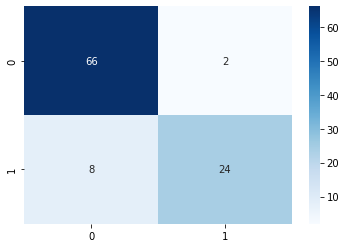

In [15]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,  cmap="Blues")